In this problem we need to see if we can predict if a flight will be delayed or not we have a large database or database as 539383 values and 9 columns here we will use the database Airline.csv 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Here we are reading the database using the name "data" in the variable

In [2]:
data=pd.read_csv(r"C:\Users\Abhijeet\ML Daily work\airlinedelays_classification\airlinedelays_classification\Airline_Delay.csv")

In [3]:
data.head(10)         # to see top 10 rows

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


**As we can see there are 539383 records and 9 features are there-**

- Categorical Variable :- Airline, AirportFrom, AirportTo,DayofWeek and Delay

- Continuous Variable :- ID, Flight, Time and Length

### ⁕ Checking Null values

Next welook at the data to find if anything is missing.

In [5]:
data.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

**There are 0 Null values are in this dataset**

### ⁕ Checking value counts of each column

In [6]:
data['DayOfWeek'].value_counts()

4    91445
3    89746
5    85248
1    72769
2    71340
7    69879
6    58956
Name: DayOfWeek, dtype: int64

In [7]:
data['Length'].value_counts()

80     13339
70     13086
65     11894
85     11840
75     11813
       ...  
481        2
418        2
457        2
417        2
23         1
Name: Length, Length: 426, dtype: int64

In [8]:
data['AirportFrom'].value_counts()


ATL    34449
ORD    24822
DFW    22154
DEN    19843
LAX    16657
       ...  
MMH       16
SJT       15
GUM       10
ADK        9
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

# Data Analysis

## Checking Correlation

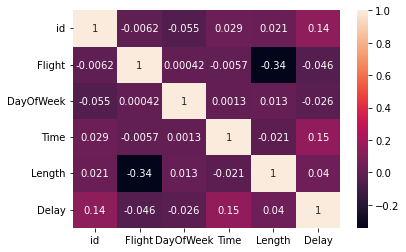

In [9]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Checking the correlation between our variables here we can see that we don't have a strong correlation between the variables

<AxesSubplot:xlabel='Delay', ylabel='count'>

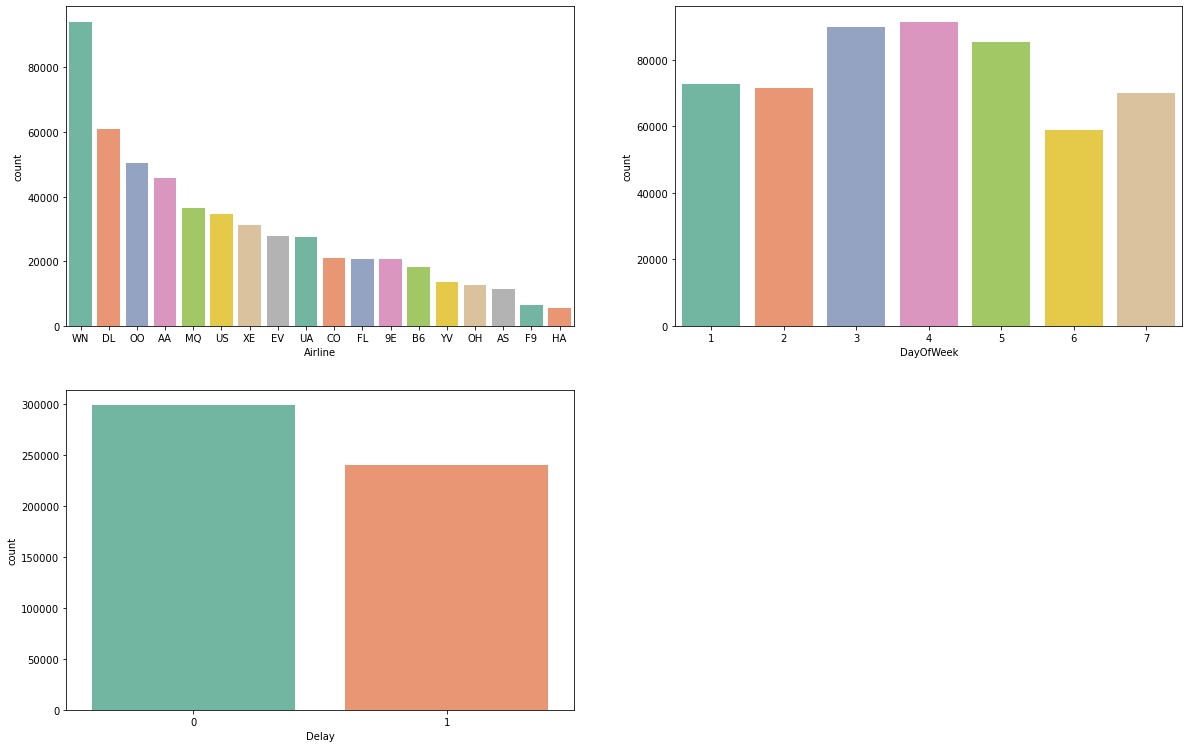

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
sns.countplot(x='Airline',palette='Set2',data=data,order=data['Airline'].value_counts().index)

plt.subplot(3,2,2)
sns.countplot(x='DayOfWeek',palette='Set2',data=data)

plt.subplot(3,2,3)
sns.countplot(x='Delay',palette='Set2',data=data)

- **Airline:** We have some airlines that fly much more than others we can see that we have airlines in our database
- **DayOfWeek :** we don't have a big difference between the day but Wednesday and Thursday are the days that we have more fly.
- **Delay:** data says has almost the same value in our variable target Air

**When we compare our variable target with another's categorical variables we can see some insights**

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

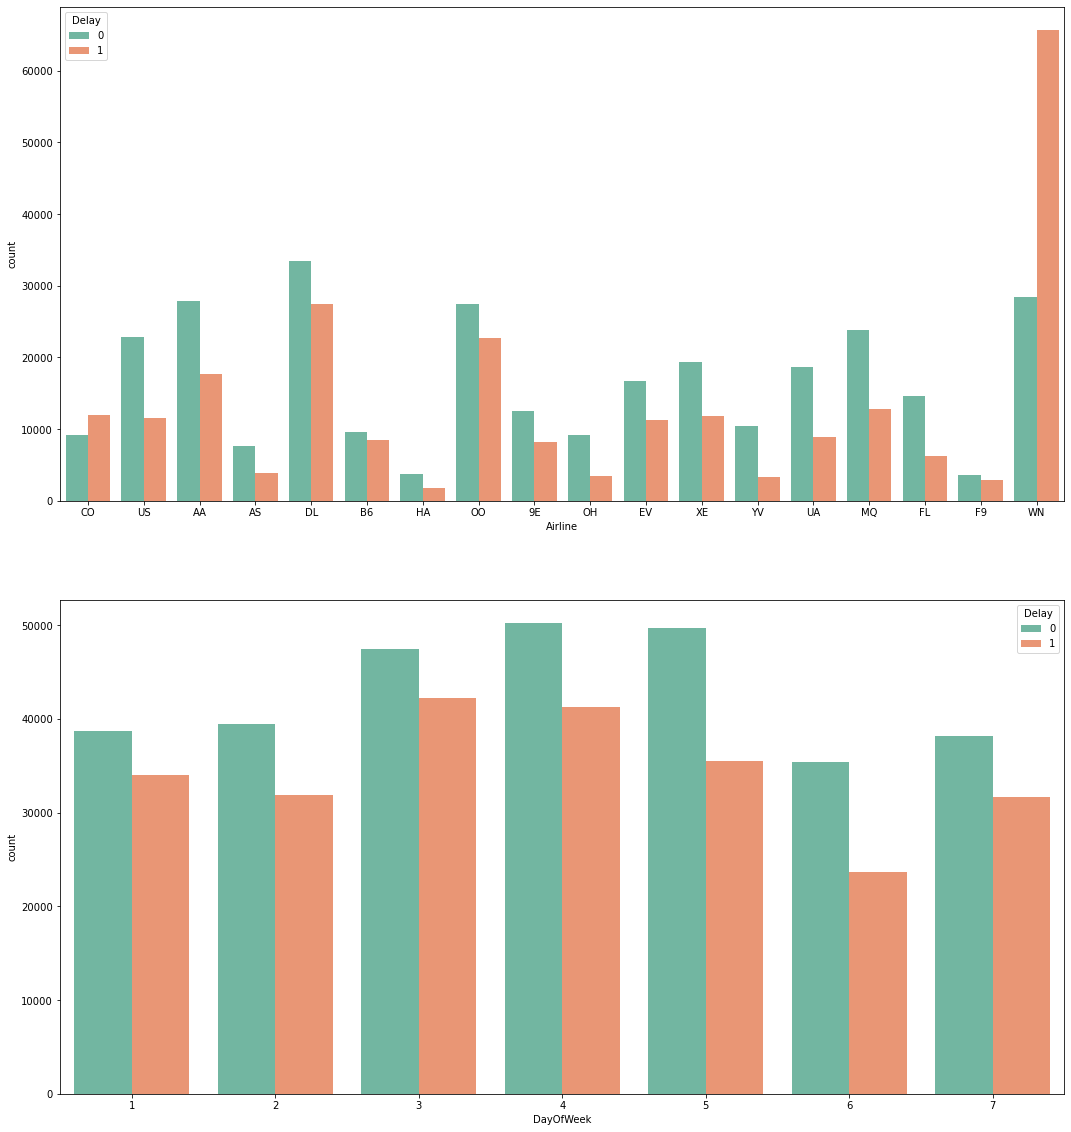

In [11]:
plt.figure(figsize=(18,20))

plt.subplot(2,1,1)
sns.countplot(x='Airline',hue='Delay',palette='Set2',data=data)

plt.subplot(2,1,2)
sns.countplot(x='DayOfWeek',hue='Delay',palette='Set2',data=data)

- We can seet that we have some airlines that has more delayed than another, like 'WN' if you catch a flight from 'WN' probably your flight will be Delayed 
- We see the variable day of week we see that there is not much  difference between the days.

### creating independent and dependent variable

In [12]:
#from sklearn.preprocessing import OrdinalEncoder
#oe=OrdinalEncoder()
#data[data_cat]=oe.fit_transform(data[data_cat])

categorical_cols = ['AirportFrom','AirportTo']
data_dumm = pd.get_dummies(data, columns=categorical_cols)

In [13]:
X = data_dumm.drop(['Airline','Delay'], axis=1)
y = data['Delay'].values

In [14]:
X

,id,Flight,DayOfWeek,Time,Length,AirportFrom_ABE,AirportFrom_ABI,AirportFrom_ABQ,AirportFrom_ABR,AirportFrom_ABY,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1,269,3,15,205,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1558,3,15,222,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2400,3,20,165,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2466,3,20,195,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,108,3,30,202,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,178,5,1439,326,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539379,539380,398,5,1439,305,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,539381,609,5,1439,255,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539381,539382,78,5,1439,313,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
# Training the logistic regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
y_test

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

C:\Users\Abhijeet\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


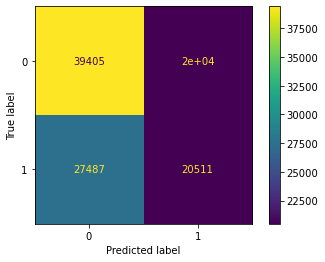

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62     59879
           1       0.50      0.43      0.46     47998

    accuracy                           0.56    107877
   macro avg       0.54      0.54      0.54    107877
weighted avg       0.55      0.56      0.55    107877



**Result using Logistic Regression is 56 % Accuracy, it's not a good model**

**lets see is there any outliers or skewness in this dataset, if found we have to drop those**

# Checking outliers

<AxesSubplot:xlabel='Length'>

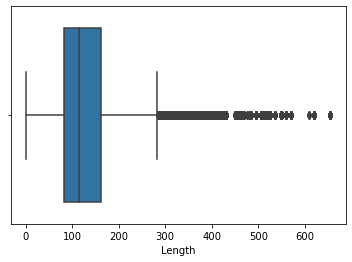

In [22]:
sns.boxplot(data=data ,x='Length')

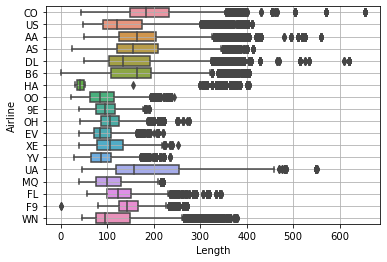

In [23]:
# Checking outliers by each Airline
sns.boxplot(data=data, x='Length', y='Airline')
plt.grid() 

## Droping Outliers

In [24]:
del_Con=data.drop(data[(data['Airline']=='CO') & (data['Length']>300)].index,inplace=True)
del_US=data.drop(data[(data['Airline']=='US') & (data['Length']>300)].index,inplace=True)
del_AA=data.drop(data[(data['Airline']=='AA') & (data['Length']>300)].index,inplace=True)
del_AS=data.drop(data[(data['Airline']=='AS') & (data['Length']>300)].index,inplace=True)
del_DL=data.drop(data[(data['Airline']=='DL') & (data['Length']>300)].index,inplace=True)
del_B6=data.drop(data[(data['Airline']=='B6') & (data['Length']>300)].index,inplace=True)
del_HA=data.drop(data[(data['Airline']=='HA') & (data['Length']>300)].index,inplace=True)
del_OO=data.drop(data[(data['Airline']=='OO') & (data['Length']>300)].index,inplace=True)
del_B6=data.drop(data[(data['Airline']=='B6') & (data['Length']>300)].index,inplace=True)
del_9E=data.drop(data[(data['Airline']=='9E') & (data['Length']>300)].index,inplace=True)
del_OH=data.drop(data[(data['Airline']=='OH') & (data['Length']>300)].index,inplace=True)
del_EV=data.drop(data[(data['Airline']=='EV') & (data['Length']>300)].index,inplace=True)
del_XE=data.drop(data[(data['Airline']=='XE') & (data['Length']>300)].index,inplace=True)
del_YV=data.drop(data[(data['Airline']=='YV') & (data['Length']>300)].index,inplace=True)
del_UA=data.drop(data[(data['Airline']=='UA') & (data['Length']>300)].index,inplace=True)
del_MQ=data.drop(data[(data['Airline']=='MQ') & (data['Length']>300)].index,inplace=True)
del_FL=data.drop(data[(data['Airline']=='FL') & (data['Length']>300)].index,inplace=True)
del_F9=data.drop(data[(data['Airline']=='F9') & (data['Length']>300)].index,inplace=True)
del_WN=data.drop(data[(data['Airline']=='WN') & (data['Length']>300)].index,inplace=True)

In [25]:
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539374,539375,DL,2354,LAX,ATL,5,1435,255,0
539375,539376,FL,58,LAX,ATL,5,1435,250,0
539376,539377,B6,717,JFK,SJU,5,1439,220,1
539377,539378,B6,739,JFK,PSE,5,1439,223,1


## ⁕ Seperating Categorical and Numerical column in two variables

In [26]:
data_num = data.select_dtypes('int64','float64')
data_cat = data.select_dtypes('object')

In [27]:
data_num

,id,Flight,DayOfWeek,Time,Length,Delay
0,1,269,3,15,205,1
1,2,1558,3,15,222,1
2,3,2400,3,20,165,1
3,4,2466,3,20,195,1
4,5,108,3,30,202,0
...,...,...,...,...,...,...
539374,539375,2354,5,1435,255,0
539375,539376,58,5,1435,250,0
539376,539377,717,5,1439,220,1
539377,539378,739,5,1439,223,1


In [28]:
data_cat

,Airline,AirportFrom,AirportTo
0,CO,SFO,IAH
1,US,PHX,CLT
2,AA,LAX,DFW
3,AA,SFO,DFW
4,AS,ANC,SEA
...,...,...,...
539374,DL,LAX,ATL
539375,FL,LAX,ATL
539376,B6,JFK,SJU
539377,B6,JFK,PSE


# Checking Skewness

id
0.0020261039342852867


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


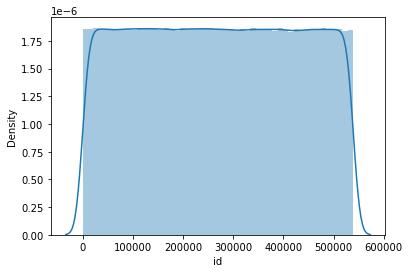

Flight
0.8312961333653953


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


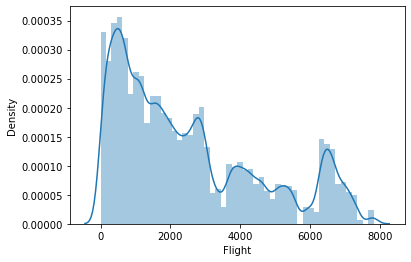

DayOfWeek
0.06454169707624813


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


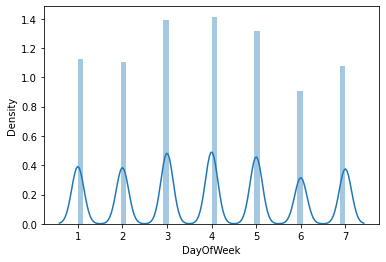

Time
0.06898235496954458


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


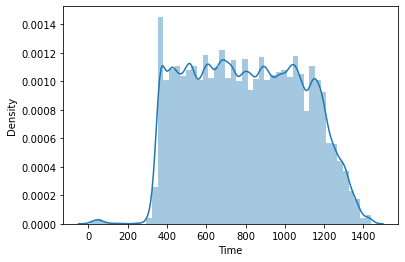

Length
0.9046813665654883


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


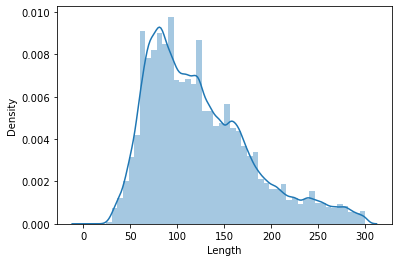

Delay
0.22180330738132073


C:\Users\Abhijeet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


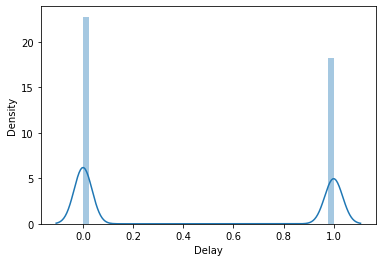

In [29]:
from scipy.stats import skew
for col in data_num:
    print(col)
    print(skew(data_num[col]))
    
    plt.figure()
    sns.distplot(data_num[col])
    plt.show()

In [30]:
skew(data_num['Flight'])

0.8312961333653953

In [31]:
data_num['Flight'] = np.sqrt(data_num['Flight'])
skew(data_num['Flight'])

0.17894884670257094

In [32]:
skew(data_num['Length'])

0.9046813665654883

In [33]:
data_num['Length'] = np.sqrt(data_num['Length'])
skew(data_num['Length'])

0.43487048810284445

In [34]:
data_num['Length'] = np.sqrt(data_num['Length'])

In [35]:
skew(data_num['Length'])

0.18631340606088287


from scipy.stats import skew
for col in data_num:
    print(col)
    print(skew(data_num[col]))
    
    plt.figure()
    sns.distplot(data_num[col])
    plt.show()

In [36]:
data=pd.concat([data_cat,data_num],axis=1)

In [37]:
data

,Airline,AirportFrom,AirportTo,id,Flight,DayOfWeek,Time,Length,Delay
0,CO,SFO,IAH,1,16.401219,3,15,3.783890,1
1,US,PHX,CLT,2,39.471509,3,15,3.860008,1
2,AA,LAX,DFW,3,48.989795,3,20,3.584025,1
3,AA,SFO,DFW,4,49.658836,3,20,3.736876,1
4,AS,ANC,SEA,5,10.392305,3,30,3.769970,0
...,...,...,...,...,...,...,...,...,...
539374,DL,LAX,ATL,539375,48.518038,5,1435,3.996088,0
539375,FL,LAX,ATL,539376,7.615773,5,1435,3.976354,0
539376,B6,JFK,SJU,539377,26.776856,5,1439,3.851285,1
539377,B6,JFK,PSE,539378,27.184554,5,1439,3.864348,1


# Prepare data for modeling

Now that the data is clean and numerical we want to separate features from targets and split it between training and test sets. 

In [38]:
categorical_cols = ['AirportFrom','AirportTo']

data = pd.get_dummies(data, columns=categorical_cols)

In [39]:
X = data.drop(['Airline','Delay'], axis=1)
y = data['Delay'].values

In [40]:
X

,id,Flight,DayOfWeek,Time,Length,AirportFrom_ABE,AirportFrom_ABI,AirportFrom_ABQ,AirportFrom_ABR,AirportFrom_ABY,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
0,1,16.401219,3,15,3.783890,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,39.471509,3,15,3.860008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,48.989795,3,20,3.584025,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,49.658836,3,20,3.736876,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,10.392305,3,30,3.769970,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539374,539375,48.518038,5,1435,3.996088,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539375,539376,7.615773,5,1435,3.976354,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539376,539377,26.776856,5,1439,3.851285,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539377,539378,27.184554,5,1439,3.864348,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
# after removing outliers and skewness we applied model then we get 
# 57 % accuracy , for getting more accuracy we have do aaply scalling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [44]:
# Training the logistic regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [45]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

C:\Users\Abhijeet\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


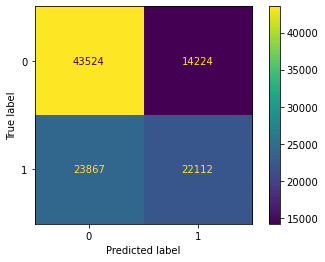

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(classifier, X_test, y_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70     57748
           1       0.61      0.48      0.54     45979

    accuracy                           0.63    103727
   macro avg       0.63      0.62      0.62    103727
weighted avg       0.63      0.63      0.63    103727



**Result using Logistic Regression is 63 % Accuracy, by removing skewness and outliers we get better accuracy as compared to previous Logistic Regression model ,but it's not a good model**

# KNN (K Nearest Neighbors)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_y_pred=knn_classifier.predict(X_test)
knn_y_pred

In [ ]:
y_test

In [ ]:
plot_confusion_matrix(knn_classifier, X_test, y_test)

In [ ]:
ac=accuracy_score(y_test,knn_y_pred)
cm=confusion_matrix(y_test,knn_y_pred)
print(ac)


# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTree= DecisionTreeClassifier(min_samples_split = 60).fit(X_train, y_train)
y_pred_tree = DTree.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)

In [ ]:
accuracy_score(y_test, y_pred_tree)

**Result using Decision Tree is 64 % Accuracy,but it's not a good model**

# Random Forest

In [ ]:
# Build Model
from sklearn.ensemble import RandomForestClassifier
import math
from sklearn import metrics

rf = RandomForestClassifier(random_state = 1, max_features = 'sqrt', n_jobs = 1, verbose = 1)
%time rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
#prediction
y_pred = rf.predict(X_test)
print(y_pred)

In [ ]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [ ]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

**Result using Logistic Regression is 69 % Accuracy, it's not a good model**

- in this project we can see that we have numerical variables and some categorical variables, in our data visualization we can see that we have some airlines that has more delays then others, we have almost the same value in delays and not delays

- When we look at machine learning models, we cant get a good models to preview when we have delay, even when we scaling the data and removing outliers

- Maybe if we have more information about the flights like such as Weather forecast, Time of year etc. we could get better result